# World's largest islands

This dataset `largest-islands.csv` contains information about the 100 largest islands in the world. The unit for the `area` column is km2.

In [1]:
# FOR GOOGLE COLAB ONLY.
# Uncomment and run the code below. A dialog will appear to upload files.
# Upload 'largest-islands.csv'.

# from google.colab import files
# uploaded = files.upload()

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('largest-islands.csv')
df.head()

,region,island,area,countries,climate,rank
0,Africa,Madagascar,591896,Madagascar,tropics,4
1,Antarctic,Kerguelen,6200,"Antarctic Lands, France",temperate,91
2,Asia,Sumba,11153,Indonesia,tropics,65
3,Asia,Hainan,34300,China,tropics,37
4,Asia,Taiwan,36198,Taiwan,tropics,36


In [4]:
#This data set not only gives us islands and their respective regions, but also their island area, their climate, and their rank based on area.

In [4]:
##I will now check for any null values in the dataset.

df.info()
df.describe()

<class 'pandas.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   region     100 non-null    str  
 1   island     100 non-null    str  
 2   area       100 non-null    int64
 3   countries  100 non-null    str  
 4   climate    100 non-null    str  
 5   rank       100 non-null    int64
dtypes: int64(2), str(4)
memory usage: 4.8 KB


,area,rank
count,1.000000e+02,100.000000
mean,9.042785e+04,50.480000
std,2.533592e+05,28.981527
min,5.302000e+03,1.000000
25%,9.282500e+03,25.750000
50%,1.594500e+04,50.500000
75%,6.508350e+04,75.250000
max,2.166086e+06,100.000000


In [ ]:
#I will now answer questions about this dataset.

In [5]:
#1.What are the 10 largest islands in the tropics ?

tropics=df[df["climate"]=="tropics"]

ten_largest_tropics=tropics.sort_values(by="area", ascending=False).head(10)

ten_largest_tropics

,region,island,area,countries,climate,rank
86,Oceania,New Guinea,821400,"Papua New Guinea, Indonesia",tropics,2
23,Asia,Borneo,755000,"Indonesia, Malaysia, Brunei",tropics,3
0,Africa,Madagascar,591896,Madagascar,tropics,4
28,Asia,Sumatra,480793,Indonesia,tropics,6
22,Asia,Sulawesi,188522,Indonesia,tropics,11
21,Asia,Java,129438,Indonesia,tropics,13
80,North America,Cuba,109884,Cuba,tropics,16
26,Asia,Luzon,104688,Philippines,tropics,17
14,Asia,Mindanao,94630,Philippines,tropics,19
73,North America,Hispaniola,76192,"Dominican Republic, Haiti",tropics,23


In [6]:
#2. What are the largest islands in each region

largest_in_regions=df.loc[df.groupby("region")["area"].idxmax()]

largest_in_regions

,region,island,area,countries,climate,rank
0,Africa,Madagascar,591896,Madagascar,tropics,4
1,Antarctic,Kerguelen,6200,"Antarctic Lands, France",temperate,91
23,Asia,Borneo,755000,"Indonesia, Malaysia, Brunei",tropics,3
35,Eurasia,Sakhalin,76400,Russia,temperate,22
41,Europe,Greenland,2166086,Denmark,polar,1
75,North America,Baffin Island,507451,Canada,polar,5
86,Oceania,New Guinea,821400,"Papua New Guinea, Indonesia",tropics,2
98,South America,Isla Grande de Tierra del Fuego,47992,"Chile, Argentina",temperate,28


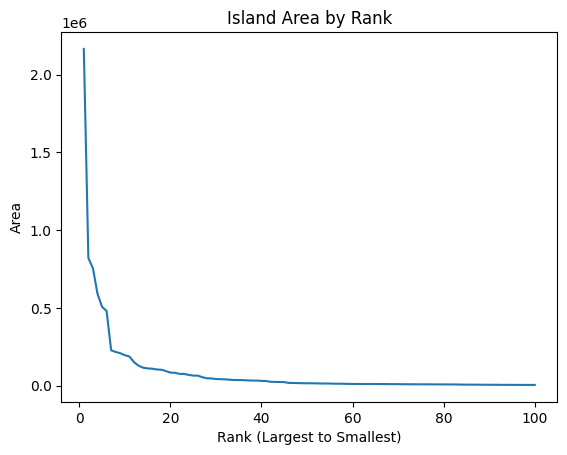

In [13]:
#3. Visualizing this data will help tremendously in finding potential patterns.

import matplotlib.pyplot as plt

ranked_islands=df.sort_values("area", ascending=False).reset_index(drop=True)
ranked_islands["rank"]=ranked_islands.index+1

plt.figure()

plt.plot(ranked_islands["rank"], ranked_islands["area"])

plt.xlabel("Rank (Largest to Smallest)")
plt.ylabel("Area")
plt.title("Island Area by Rank")

plt.show()

In [ ]:
#The steep drop at approximately rank 3 indicates that island size drastically decreases. The long-tail shape of this distribution reflects possible outliers in the dataset.  

In [14]:
#4. Find islands that are composed of multiple countries.

multiple_country_islands=df[df["countries"].str.contains(",", na=False)]

multiple_country_islands

,region,island,area,countries,climate,rank
1,Antarctic,Kerguelen,6200,"Antarctic Lands, France",temperate,91
23,Asia,Borneo,755000,"Indonesia, Malaysia, Brunei",tropics,3
45,Europe,Ireland,84421,"Ireland, United Kingdom",temperate,20
50,Europe,Cyprus,9251,"Cyprus, United Kingdom",temperate,76
73,North America,Hispaniola,76192,"Dominican Republic, Haiti",tropics,23
86,Oceania,New Guinea,821400,"Papua New Guinea, Indonesia",tropics,2
98,South America,Isla Grande de Tierra del Fuego,47992,"Chile, Argentina",temperate,28


In [ ]:
#Islands may have multiple countries due to colonial influences. For instance, the island Hispaniola is seperated into two countries due to a colonial split in the 17th century where Spain relinquished the western part of its island to France
#A new column for multi-country islands will improve clarity.

In [5]:
import pandas as pd
df=pd.read_csv('largest-islands.csv')

df["multi_country_islands"]=df["countries"].str.contains(",")
df.head()

,region,island,area,countries,climate,rank,multi_country_islands
0,Africa,Madagascar,591896,Madagascar,tropics,4,False
1,Antarctic,Kerguelen,6200,"Antarctic Lands, France",temperate,91,True
2,Asia,Sumba,11153,Indonesia,tropics,65,False
3,Asia,Hainan,34300,China,tropics,37,False
4,Asia,Taiwan,36198,Taiwan,tropics,36,False
